# Project 1 - Crypto Currency Dashboard

In [88]:
# Imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import numpy_financial as npf
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [89]:
# Load .env environment variables

import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
load_dotenv()

True

In [90]:
# Read the csv on cryptocurrency
    
combined_rtn= pd.read_csv(Path('Resources/combined_returns_df.csv'))
combined_vol= pd.read_csv(Path('Resources/combined_vol_df.csv'))


In [91]:
del combined_rtn['Unnamed: 0']
del combined_vol['Unnamed: 0']

In [92]:
corr_rtn=combined_rtn.corr()
corr_vol=combined_vol.corr()

In [93]:
def corr_rtn_function():
    return corr_rtn.hvplot(title='Returns Correlation',xlabel='Ticker',ylabel='Correlation')

In [113]:
def corr_rtn_heat():
    return px.imshow(corr_rtn)

In [95]:
def corr_vol_function():
    return corr_vol.hvplot(title='Volume Correlation',xlabel='Ticker',ylabel='Correlation')

In [112]:
def corr_vol_heat():
    return px.imshow(corr_vol)

In [100]:
def combined_rtn_function():
    return px.scatter(combined_rtn, x = "Date", y = ['BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD'], title='Average Return by Ticker') 

In [101]:
def combined_vol_function():
    return px.scatter(combined_vol, x = "Date", y = ['BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD'],title='Average Volume by Ticker') 

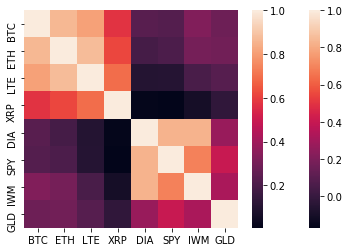

In [109]:
 # Create a Title for the Dashboard
Crypto = pn.Column('Crypto vs stocks: Volume and Returns - Do they correlate?')
                           
rtn_df = pn.Column(corr_rtn_function(),corr_rtn_heat())
vol_df = pn.Column(corr_vol_function(),corr_vol_heat())
agg_df = pn.Column(combined_rtn_function(),combined_vol_function())


dashboard_content = pn.Tabs(
    ('Welcome', Crypto),
    ('Return Correlation', rtn_df),
    ('Volume Correlation', vol_df),
    ('Aggregate Returns & Volume', agg_df)
)



In [ ]:
# Serve the# dashboard
dashboard_content.servable()